<a href="https://colab.research.google.com/github/jupiterthought/my-reposito/blob/main/missing_value%26outlier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
+
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/titanic_dataset.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(871, 12)

In [ ]:
data.drop("PassengerId",axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
sel_columns=[ 'Age','Cabin','Embarked']

In [ ]:
freq_graph=data.select_dtypes(include='float')

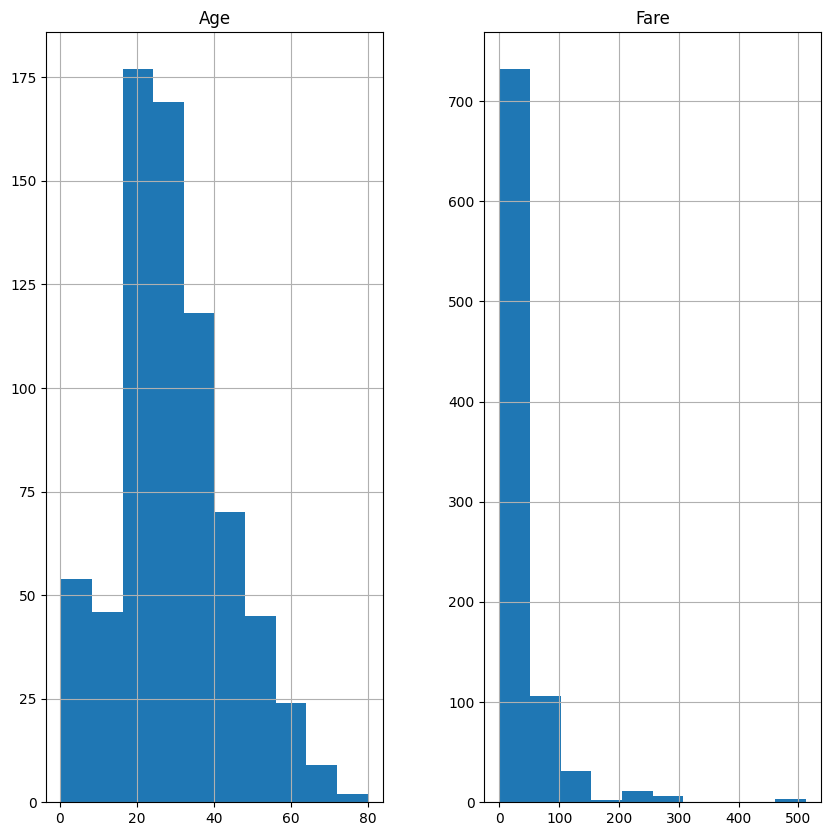

In [ ]:
freq_graph.hist(figsize=(10,10))
plt.show()

In [ ]:
for i in['Age','Cabin','Embarked']:
  data[i]=data[i].fillna(data[i].mode()[0])

In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


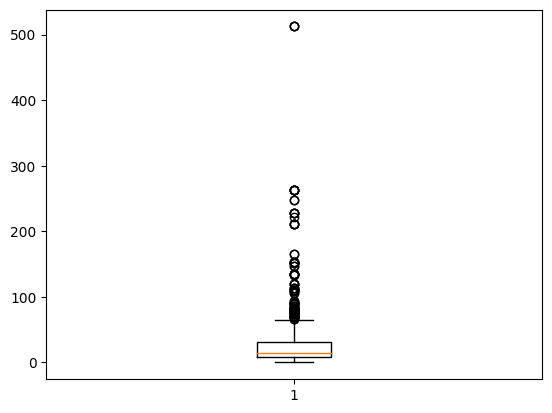

In [ ]:
plt.boxplot(data['Fare'])
plt.show()

In [ ]:
Q1=np.percentile(data['Fare'],25)

In [ ]:
Q1

7.9104

In [ ]:
Q2=np.percentile(data['Fare'],50)

In [ ]:
Q2

14.4542

In [ ]:
Q3=np.percentile(data['Fare'],75)

In [ ]:
Q3

31.0

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

23.0896

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [ ]:
lower_limit

-26.724

In [ ]:
upper_limit

65.6344

In [ ]:
outlier=[]
for x in data['Fare']:
    if x<lower_limit or x>upper_limit:
         outlier.append(x)

In [ ]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [ ]:
ind=data["Fare"]>upper_limit
data.loc[ind].index

Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
       ...
       792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype='int64', length=116)

In [ ]:
data.drop([1,  27,  31,  34,  52,  61,  62,  72,  88, 102,792, 802, 820, 829, 835, 846, 849, 856, 863, 879], inplace=True)

In [ ]:
data.shape

(871, 12)

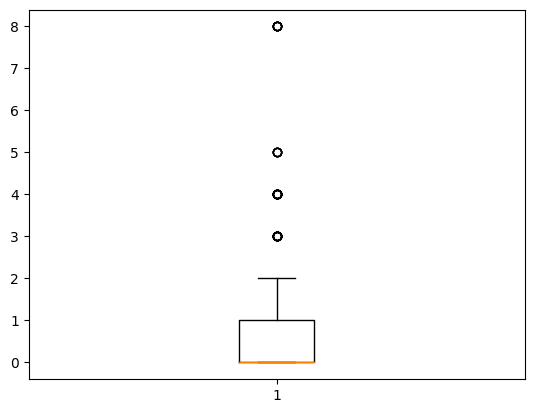

In [ ]:
plt.boxplot(data['SibSp'])
plt.show()

In [ ]:
Q1=np.percentile(data['SibSp'],25)

In [ ]:
Q1

0.0

In [ ]:
Q2=np.percentile(data['SibSp'],50)

In [ ]:
Q2

0.0

In [ ]:
Q3=np.percentile(data['SibSp'],75)

In [ ]:
Q3

1.0

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

1.0

In [ ]:
lower_limit=Q1-1.5*IQR

In [ ]:
lower_limit

-1.5

In [ ]:
upper_limit=Q3+1.5*IQR

In [ ]:
upper_limit

2.5

In [ ]:
outlier=[]
for x in data['SibSp']:
    if x<lower_limit or x>upper_limit:
         outlier.append(x)

In [ ]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [ ]:
ind=data["SibSp"]>upper_limit
data.loc[ind].index

Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159, 164,
       171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386,
       409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819,
       824, 846, 850, 863],
      dtype='int64')

In [ ]:
data.drop([7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159, 164,
       171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386,
       409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819,
       824, 846, 850, 863],inplace=True)

In [ ]:
data.shape

(845, 12)